In [52]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np
from scipy.ndimage import rotate

In [23]:
# Load the MNIST dataset
(TrainInput, TrainOutput), (TestValInput, TestValOutput) = mnist.load_data()

In [27]:
def check_tensor_sizes(TrainInput, TrainOutput, TestInput, TestOutput, ValInput, ValOutput):
    D = [TrainInput, TrainOutput, TestInput, TestOutput, ValInput, ValOutput]
    totaltrajectories = 0
    
    tensornames = ['train input', 'train output', 'test input', 'test output', 'validation input', 'validation output']
    print(f"{'Tensor Name': <30}{'Shape': <30}")
    print("_"*60)
    for _ in range(len(D)):
        totaltrajectories += D[_].shape[0]
        print(f"{tensornames[_]: <30}{str(D[_].shape): <30}")
        
        if(_ % 2 != 0):
            print('')
        
    print('')
    print("There are ", int(totaltrajectories/2), ' different images with their corresponding labels.')

In [26]:
ValInput, TestInput, ValOutput, TestOutput = train_test_split(TestValInput, TestValOutput, test_size = 0.5, random_state=31)

check_tensor_sizes(TrainInput, TrainOutput, TestInput, TestOutput, ValInput, ValOutput)

Tensor Name                   Shape                         
____________________________________________________________
train input                   (60000, 28, 28)               
train output                  (60000,)                      

test input                    (5000, 28, 28)                
test output                   (5000,)                       

validation input              (5000, 28, 28)                
validation output             (5000,)                       


There are  70000  different trajectories.


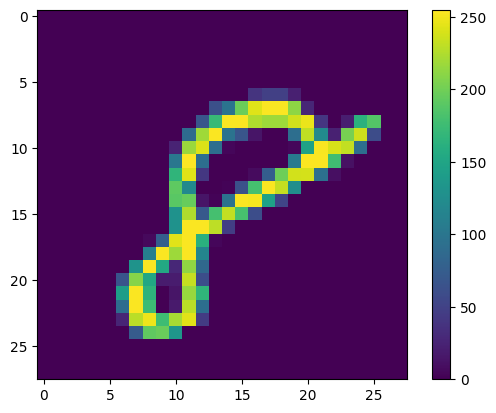

In [51]:
plt.imshow(TrainInput[59999])
plt.colorbar()

In [38]:
print(np.max(TrainInput[0]))

255


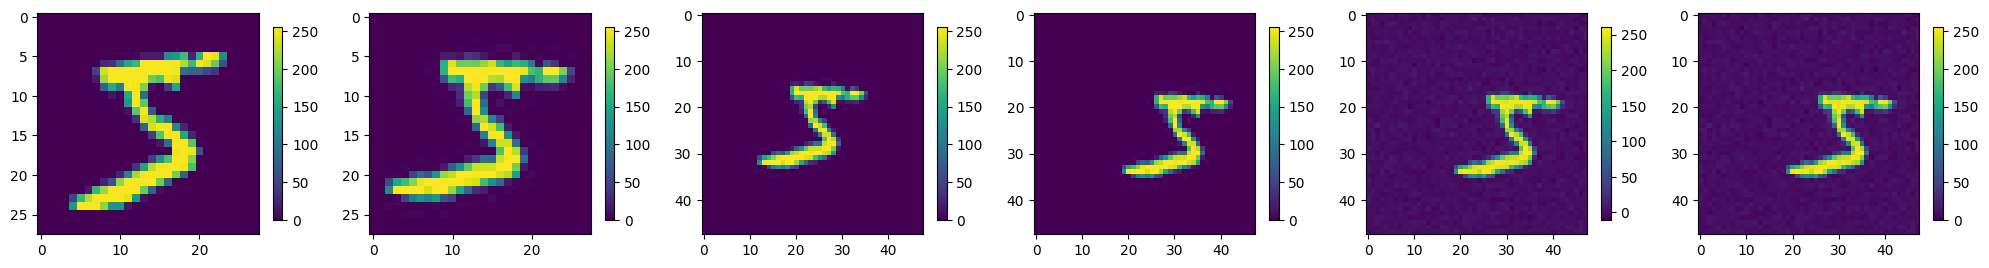

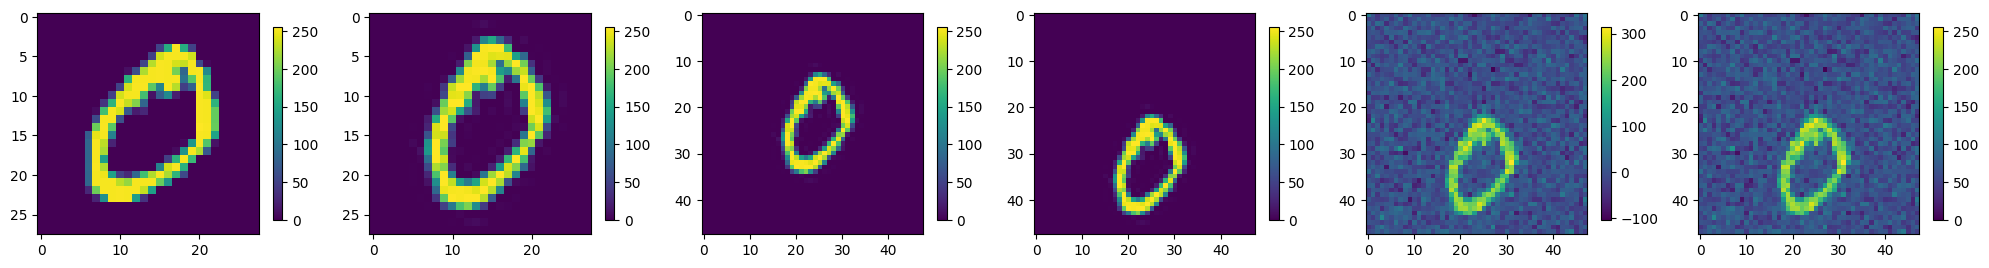

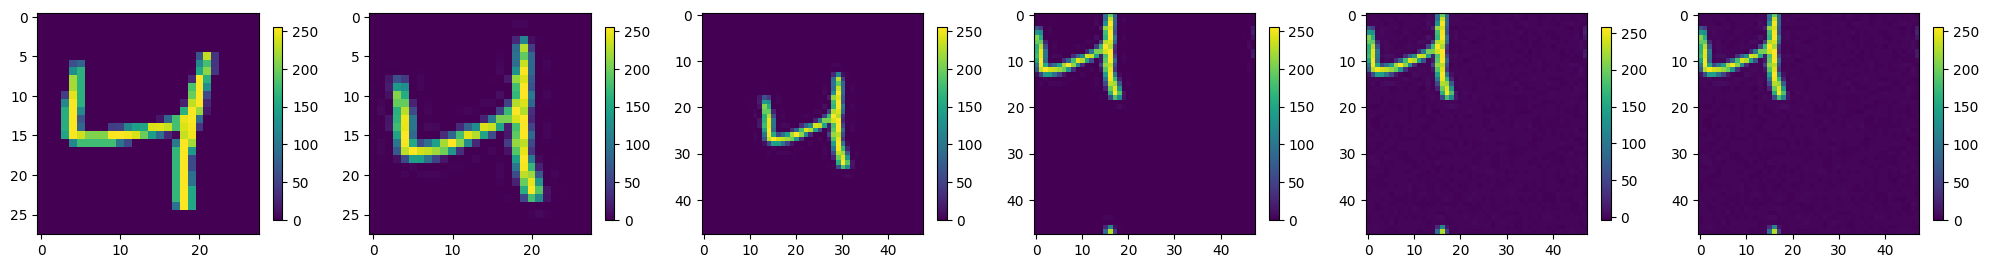

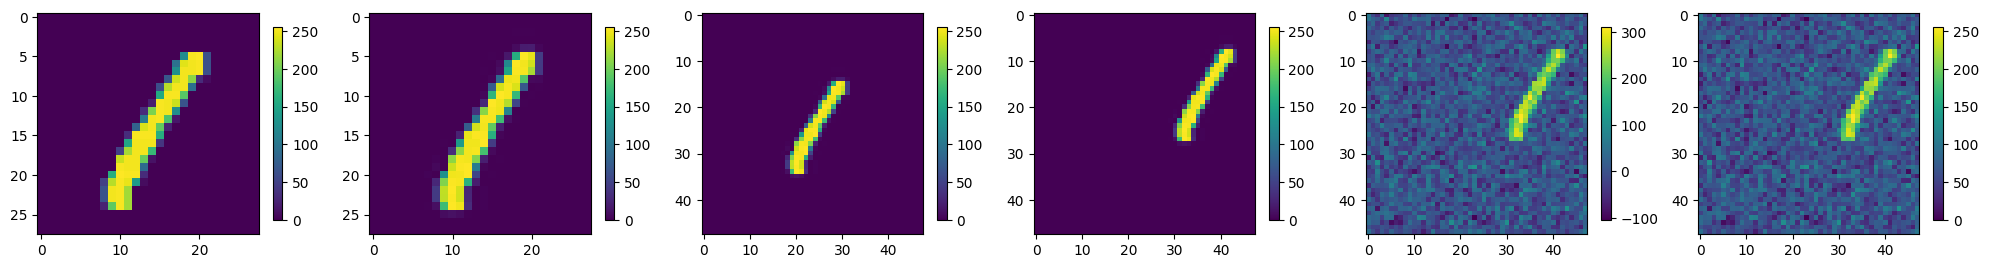

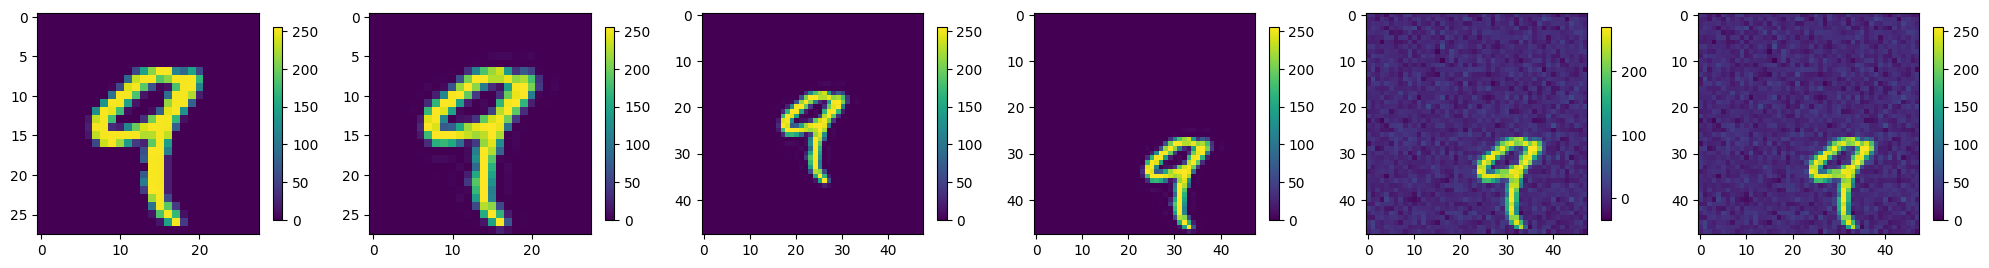

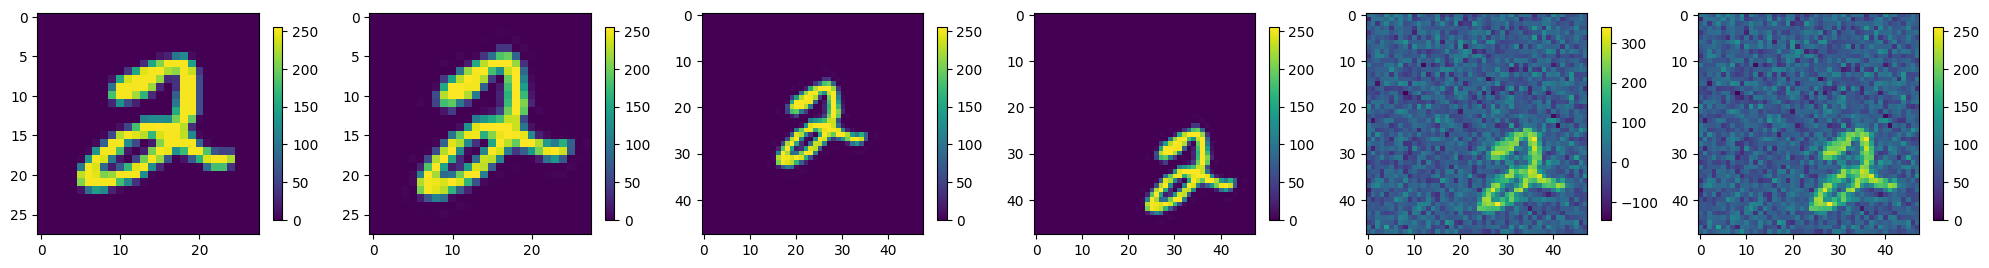

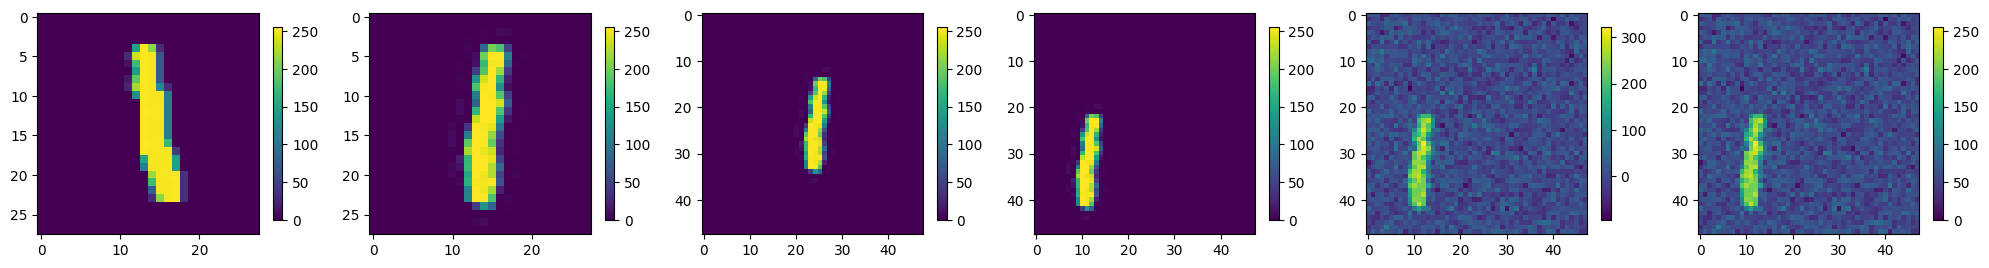

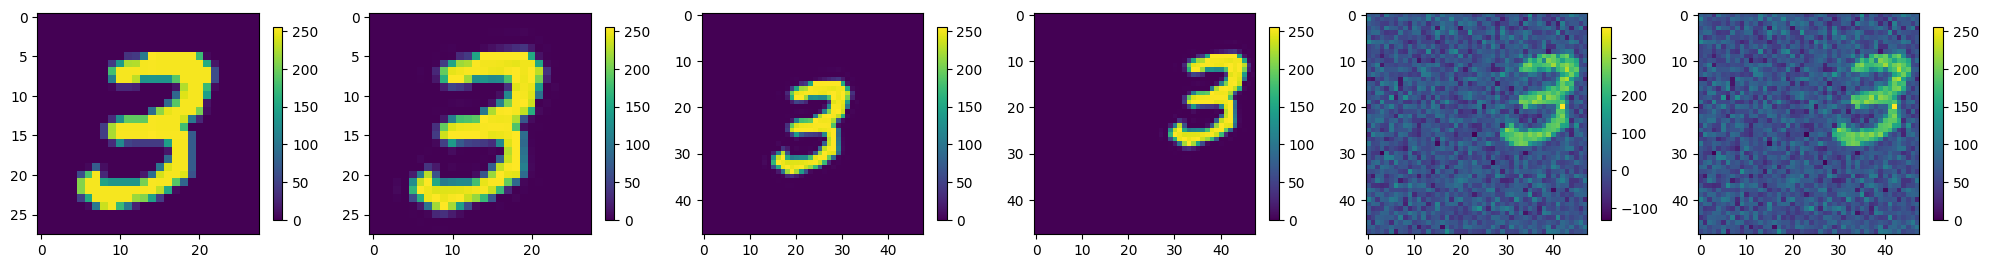

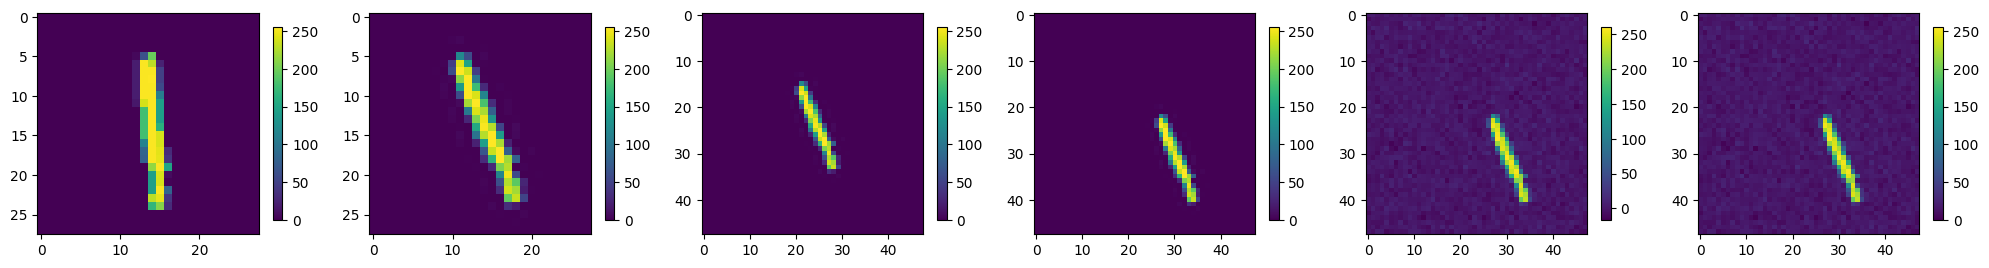

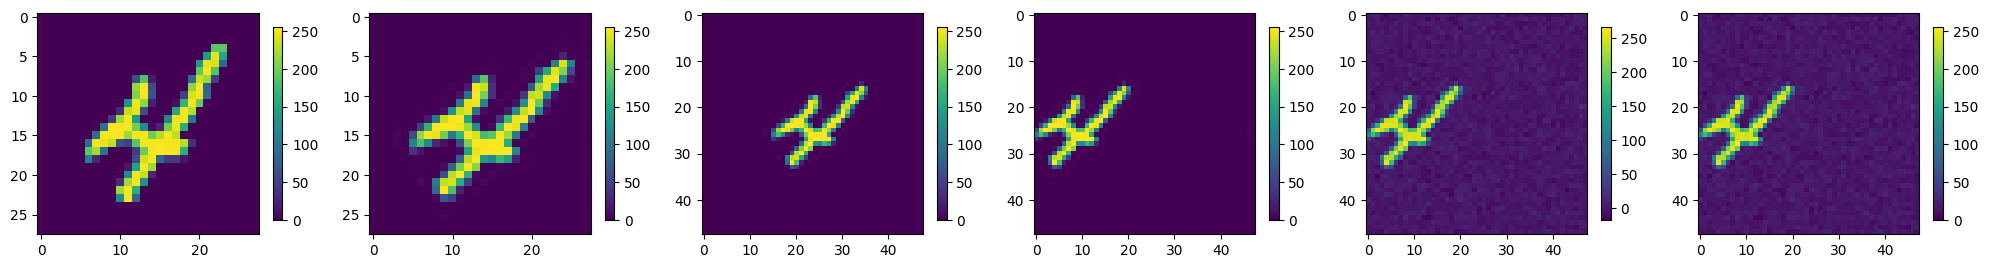

In [71]:
import numpy as np

def add_gaussian_noise(matrix, mean=0, std=0.1):
    noise = np.random.normal(mean, std, size=matrix.shape)
    noisy_matrix = matrix + noise
    return noisy_matrix

def scale_matrix(matrix, new_min=0, new_max=255):
    min_val = np.min(matrix)
    max_val = np.max(matrix)
    scaled_matrix = ((matrix - min_val) / (max_val - min_val)) * (new_max - new_min) + new_min
    return scaled_matrix

def expand_matrix(matrix, num_rows_to_add, num_cols_to_add, fill_value=0):
    expanded_matrix = np.pad(matrix, ((num_rows_to_add, num_rows_to_add), (num_cols_to_add, num_cols_to_add)), mode='constant', constant_values=fill_value)
    return expanded_matrix

def shift_matrix(matrix):
    
    shift_amount = np.random.randint(-15, 15, size=2)  # Shifts can be -1, 0, or 1
    shifted_matrix = np.zeros_like(matrix)
    rows, cols = matrix.shape
    for r in range(rows):
        for c in range(cols):
            new_r = (r + shift_amount[0]) % rows
            new_c = (c + shift_amount[1]) % cols
            shifted_matrix[new_r, new_c] = matrix[r, c]
    return shifted_matrix



for _ in range(10):
    original_matrix = TrainInput[_]

    angle = np.random.randint(-20, 20)
    rotated_matrix = rotate(original_matrix, angle, reshape=False)

    expanded_matrix = expand_matrix(rotated_matrix, num_rows_to_add=10, num_cols_to_add=10, fill_value=0)

    shifted_matrix = shift_matrix(expanded_matrix)

    noise_level = np.random.randint(0, 50)
    noisy_matrix = add_gaussian_noise(shifted_matrix, mean=0, std=noise_level)

    scaled_noisy_matrix = scale_matrix(noisy_matrix, new_min=0, new_max=255)

    plt.figure(figsize=(25, 5))

    plt.subplot(1, 6, 1)
    plt.imshow(original_matrix)
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1, 6, 2)
    plt.imshow(rotated_matrix)
    plt.colorbar(shrink=0.5)

    plt.subplot(1, 6, 3)
    plt.imshow(expanded_matrix)
    plt.colorbar(shrink=0.5)

    plt.subplot(1, 6, 4)
    plt.imshow(shifted_matrix)
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1, 6, 5)
    plt.imshow(noisy_matrix)
    plt.colorbar(shrink=0.5)
    
    plt.subplot(1, 6, 6)
    plt.imshow(scaled_noisy_matrix)
    plt.colorbar(shrink=0.5)

    plt.show()


Original Matrix:


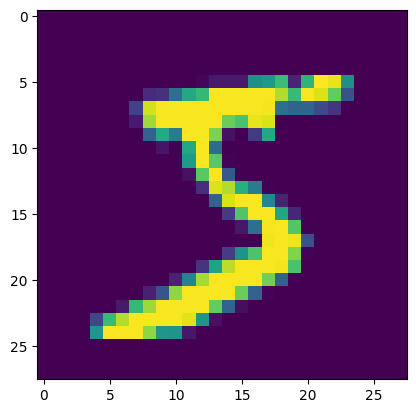


Noisy Matrix with Salt and Pepper Noise:


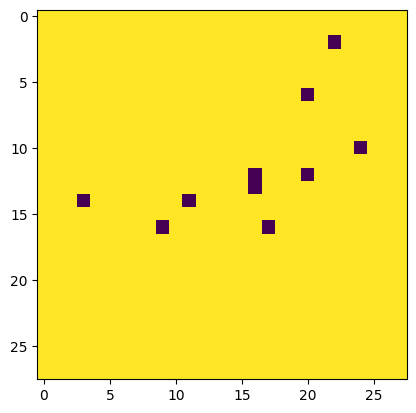

In [80]:
# Create a sample 2D matrix
original_matrix = TrainInput[0]

# Add salt and pepper noise
salt_pepper_ratio = 0.01
salt_pepper_mask = np.random.rand(*original_matrix.shape) < salt_pepper_ratio
noisy_matrix = original_matrix.copy()
noisy_matrix[salt_pepper_mask] = 0  # Pepper noise
noisy_matrix[np.logical_not(salt_pepper_mask)] = 1  # Salt noise

print("Original Matrix:")
plt.imshow(original_matrix)
plt.show()
print("\nNoisy Matrix with Salt and Pepper Noise:")
plt.imshow(noisy_matrix)
plt.show()

Original Matrix:


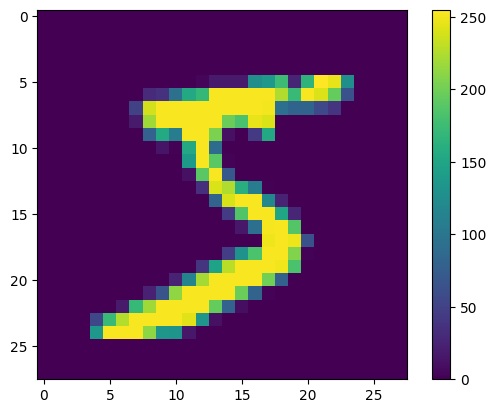


Noisy Matrix with Salt and Pepper Noise:


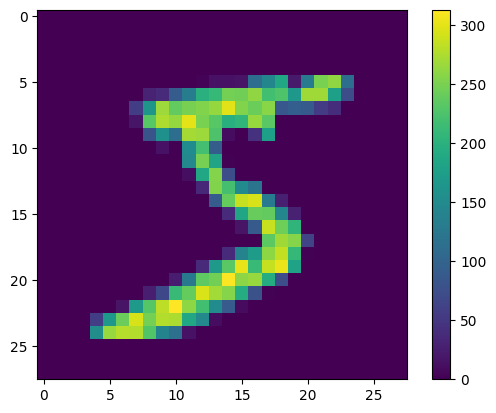


Scaled Noisy Matrix with Salt and Pepper Noise:


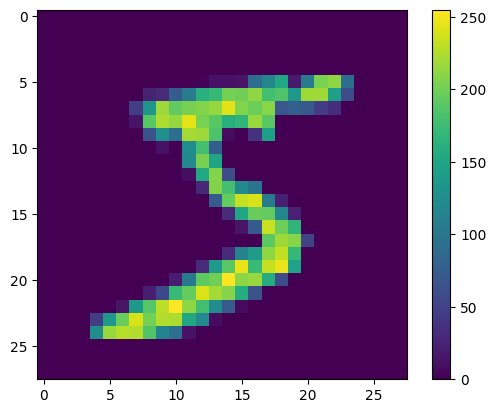

In [86]:
# Create a sample 2D matrix
original_matrix = TrainInput[0]

# Add speckle noise
speckle_noise = np.random.normal(0, 0.1, size=original_matrix.shape)
noisy_matrix = original_matrix + original_matrix * speckle_noise

print("Original Matrix:")
plt.imshow(original_matrix)
plt.colorbar()
plt.show()
print("\nNoisy Matrix with Salt and Pepper Noise:")
plt.imshow(noisy_matrix)
plt.colorbar()
plt.show()

scaled_noisy_matrix = scale_matrix(noisy_matrix, new_min=0, new_max=255)

print("\nScaled Noisy Matrix with Salt and Pepper Noise:")
plt.imshow(scaled_noisy_matrix)
plt.colorbar()
plt.show()